<a href="https://colab.research.google.com/github/JMML2021/0302-Visualitzaci-gr-fica-de-M-ltiples-variables/blob/main/0302_Visualitzacio_grafica_de_Multiples_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [33]:
# Open the choosen file
df = pd.read_csv(r'https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Data-sources/tips.csv',  delimiter="," , quotechar ='"')
 
df.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [34]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [4]:
print('La media de total_bill es: ', round(df.total_bill.mean(),2), '€')

La media de total_bill es:  19.79 €


In [5]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [6]:
df.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


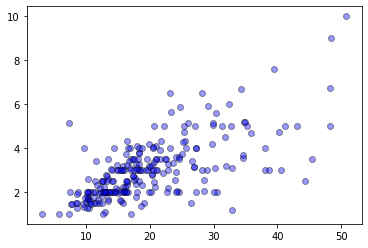

In [7]:
# Plot
x= df['total_bill']
y= df['tip']
colors = 'Blue'

plt.scatter(x, y, c=colors, alpha=0.4, edgecolors='black')

#Scatter plot

#Histograma

Text(0.5, 0, '# Characters (in thousands)')

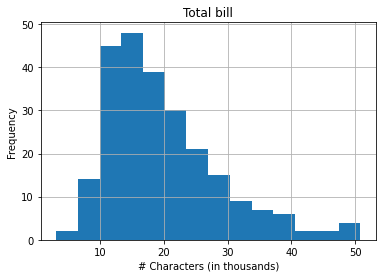

In [8]:
df.hist(['total_bill'], bins=14)
plt.title('Total bill')
plt.ylabel('Frequency')
plt.xlabel('# Characters (in thousands)')

#SUMMARY STATISTICS

In [9]:
print('aqui tienes todos los estadisticos de la base de datos continuos (No discretos)')
df.describe().round(2)

aqui tienes todos los estadisticos de la base de datos continuos (No discretos)


,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [42]:
 desvStd = df.total_bill.std()
print ('desviacion estandar', round(desvStd,3))

desviacion estandar 8.902


In [41]:
print('Para saber el valor de Q1, Q2, IQR:')
(df['total_bill']).describe()

Para saber el valor de Q1, Q2, IQR:


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

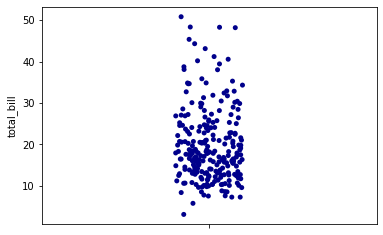

In [40]:
sns.stripplot(y=df["total_bill"], orient='v', color='darkblue')

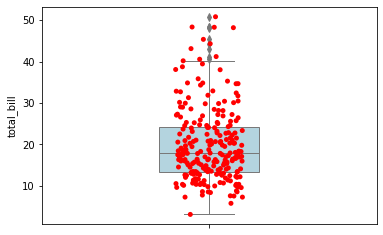

In [13]:
ax = sns.boxplot(y=df["total_bill"], data=df,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=df["total_bill"], orient='v', color='red')

#EXERCISE - 3.8

What percent of the data fall between Q1 and the median?
What percent is between the median and Q3?

EXERCISE - 3.9

estimate the following values for num_char in the  dataset:

a).- Q1

b).- Q3 and

c).- IQR

In [39]:
# calcular el rango intercuartílico  
q3, q1, mediana = np. percentile (df['total_bill'], [75, 25, 50]).round(2)
iqr = q3 - q1
print('Q1: ', q1)
print('Q3: ', q3)
print('mediana: ', mediana)
print('IQR: ', iqr)

Q1:  13.35
Q3:  24.13
mediana:  17.8
IQR:  10.78


In [53]:
tips = df.copy()
tips.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [54]:

tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


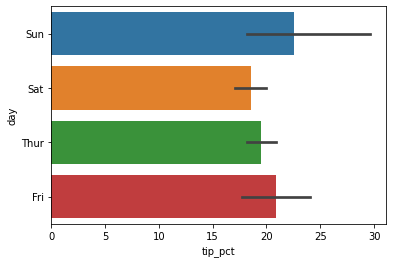

In [55]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

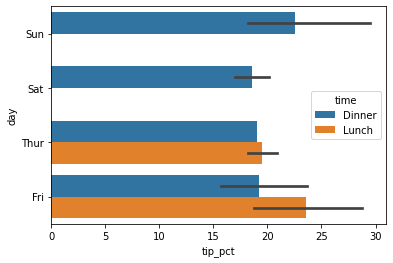

In [56]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [58]:
round(tips.describe(include='all'), 1)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.0,244.0,244,244,244,244,244.0,244.0
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.8,3.0,NaN,NaN,NaN,NaN,2.6,20.2
std,8.9,1.4,NaN,NaN,NaN,NaN,1.0,16.3
min,3.1,1.0,NaN,NaN,NaN,NaN,1.0,3.7
25%,13.3,2.0,NaN,NaN,NaN,NaN,2.0,14.8
50%,17.8,2.9,NaN,NaN,NaN,NaN,2.0,18.3
75%,24.1,3.6,NaN,NaN,NaN,NaN,3.0,23.7


In [59]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [60]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [64]:
(tips['tip']).median()

2.9

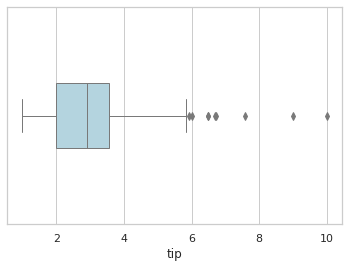

In [65]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

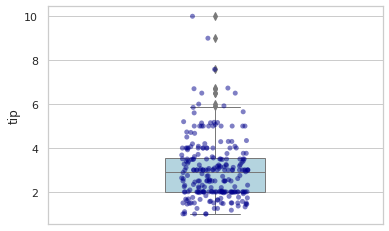

In [66]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

#Una Variable: 1 Numérica = 'tip_pct'

In [67]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

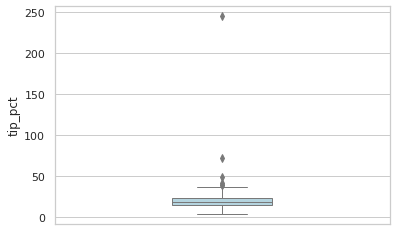

In [68]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

**Dos Variables:** 1 Categórica = 'day', 1 Numérica = 'tip_pct'

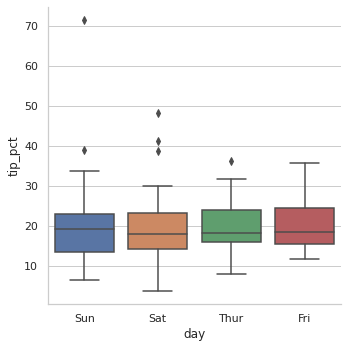

In [69]:
# añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

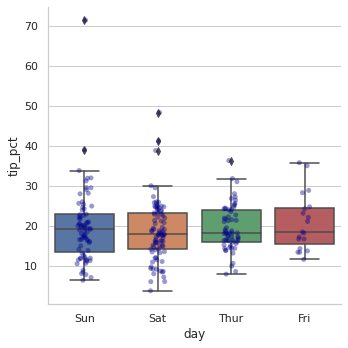

In [70]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

**Tres Variables :** 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'

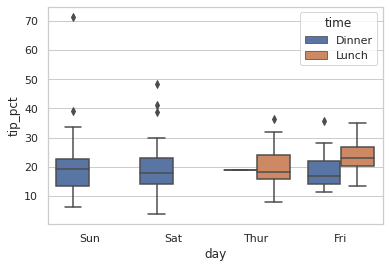

In [71]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

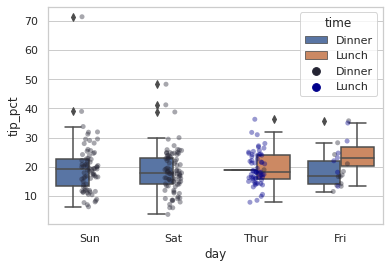

In [72]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

#Facet Grids y Categorical DataFrame
Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional.

Usando el método factorplot( ) de "Facet Grid" :

Cuatro Variables **texto en negrita** : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'

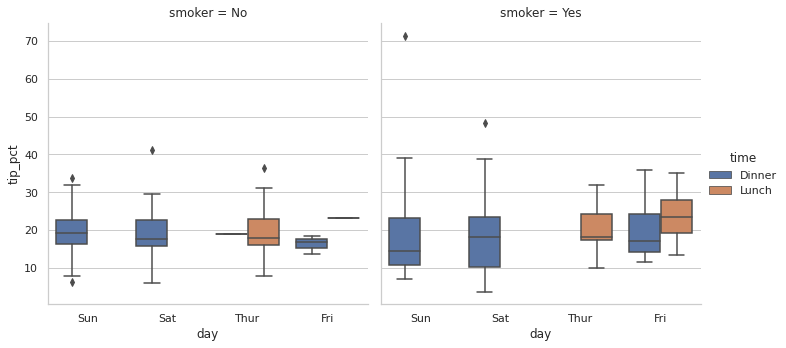

In [73]:

sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

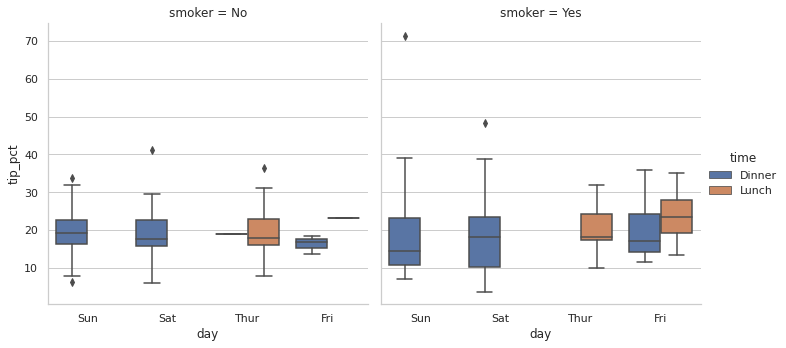

In [74]:

sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);